In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("tourism-arrival.csv")
df['Value'] = df['Value'].replace('-', 0).astype(int)
print(df.head())

   Year Age_Group   Value   Total
0  1995      0-15   22878  363395
1  1995     16-30  106603  363395
2  1995     31-45  120212  363395
3  1995     46-60   76647  363395
4  1995       60+   37055  363395


In [6]:
df['Percentage'] = (df['Value'] / df['Total']) * 100


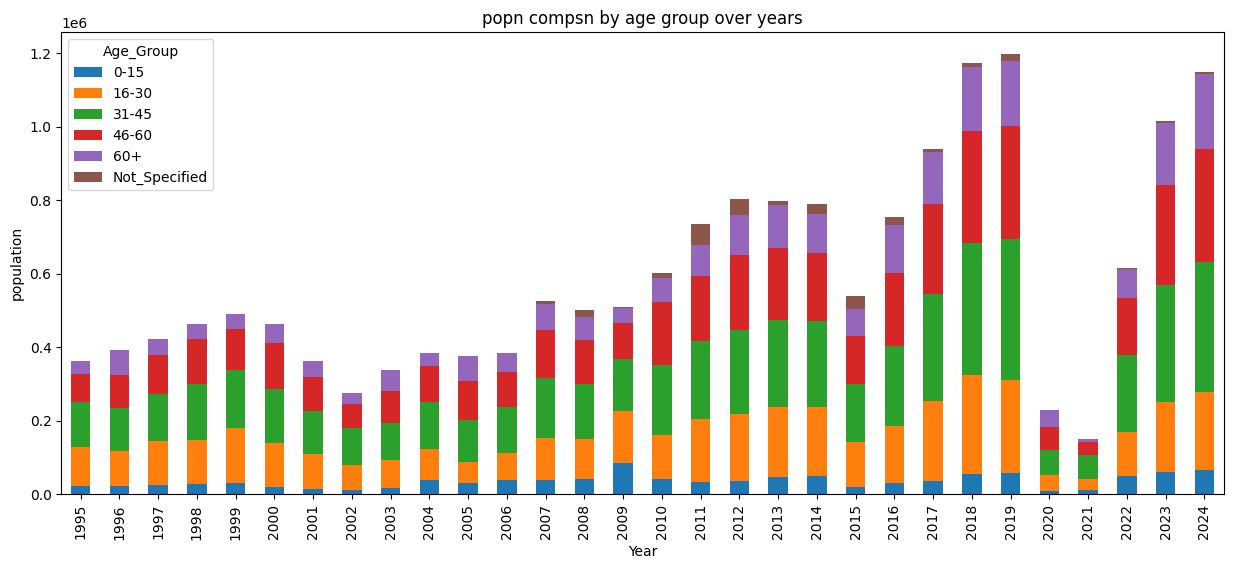

In [11]:

#plot stacked bar chart for compn per year
pivot_df = df.pivot(index='Year', columns='Age_Group', values='Value').fillna(0)
pivot_df.plot(kind='bar',stacked=True,figsize=(15,6))
plt.title("popn compsn by age group over years")
plt.ylabel("population")
plt.xlabel("Year")

plt.show()


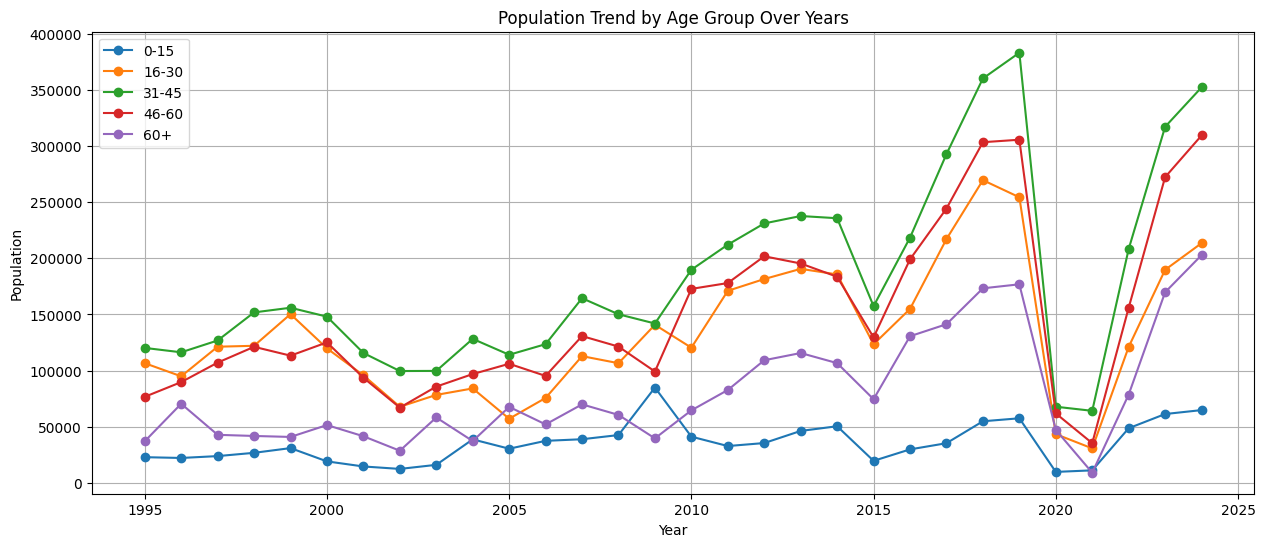

In [14]:
#line chart trend of age group
plt.figure(figsize=(15,6))
for age_group in df['Age_Group'].unique():
    if age_group != 'Not_Specified':  # Optional: skip Not_Specified
        plt.plot(df[df['Age_Group']==age_group]['Year'],
                 df[df['Age_Group']==age_group]['Value'],
                 marker='o', label=age_group)

plt.title("Population Trend by Age Group Over Years")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.show()


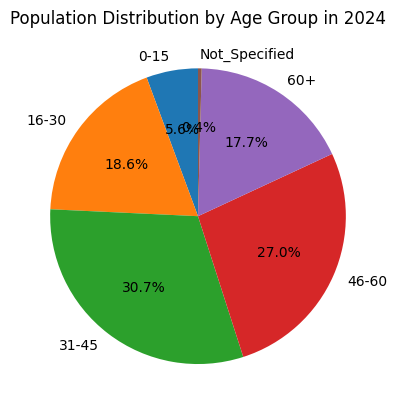

In [17]:
#pie chart for one year  2024
year=2024
data_year= df[df['Year']==year].set_index('Age_Group')['Value']
data_year.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title(f"Population Distribution by Age Group in {year}")
plt.ylabel("")
plt.show()



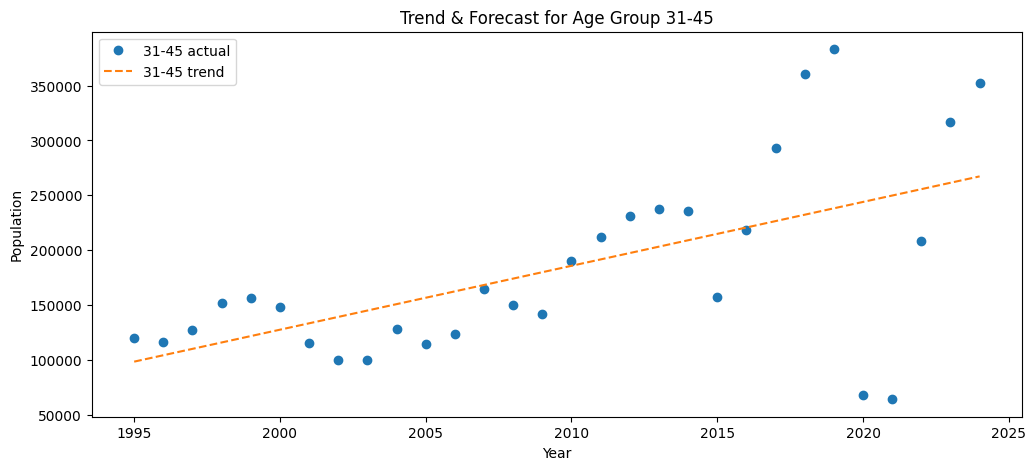

In [18]:
years = df['Year'].unique()
age_group = '31-45'

values = df[df['Age_Group']==age_group]['Value']

# Fit linear regression
coeffs = np.polyfit(years, values, 1)
trend = np.poly1d(coeffs)

plt.figure(figsize=(12,5))
plt.plot(years, values, 'o', label=f"{age_group} actual")
plt.plot(years, trend(years), '--', label=f"{age_group} trend")
plt.title(f"Trend & Forecast for Age Group {age_group}")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.show()


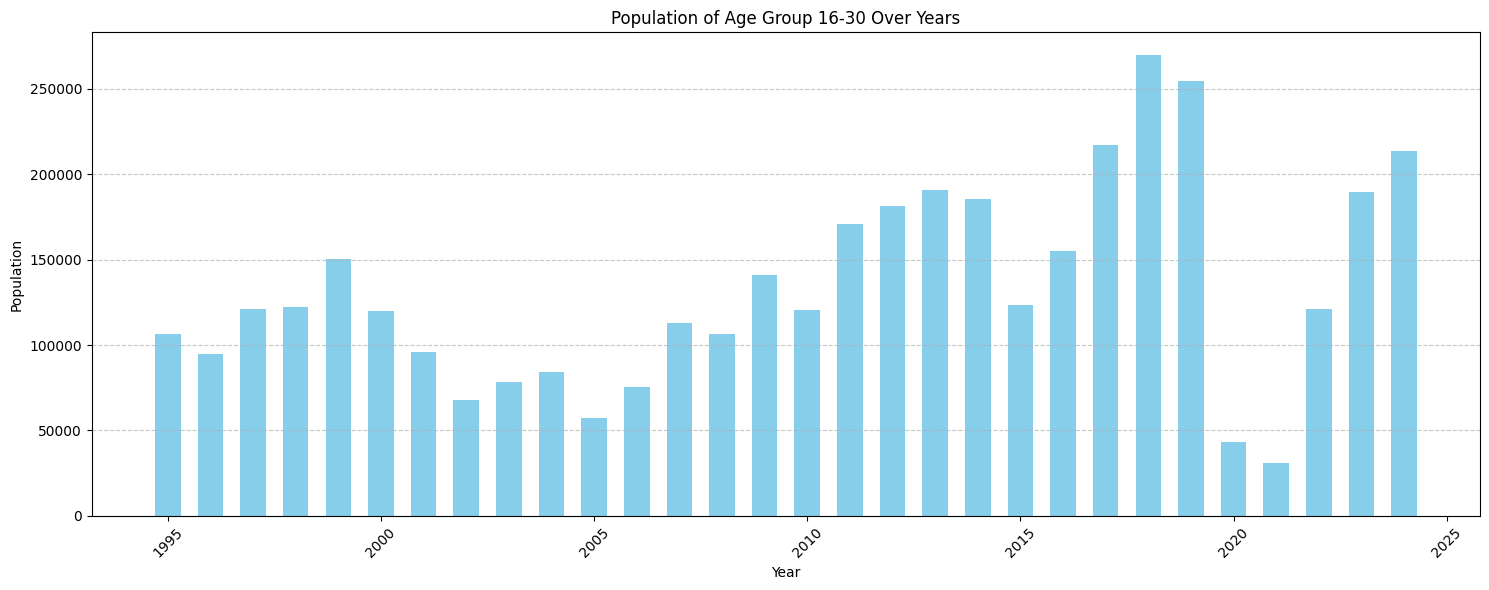

In [19]:
age_group_df=df[df['Age_Group']=='16-30']
plt.figure(figsize=(15,6))

plt.bar(age_group_df['Year'], age_group_df['Value'], color='skyblue', width=0.6)
plt.title("Population of Age Group 16-30 Over Years")
plt.xlabel("Year")
plt.ylabel("Population")
plt.xticks(rotation=45)  # Rotate year labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()